In [1]:
import battleship as ship
import genetic_algorithm as ga

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Setting Up the Board

Correct number of pieces on board
0000111000000000000000000111100000000000000001000000010100000001010000000101000010000100001000000000


Text(0.5, 1.0, 'Battleship Board')

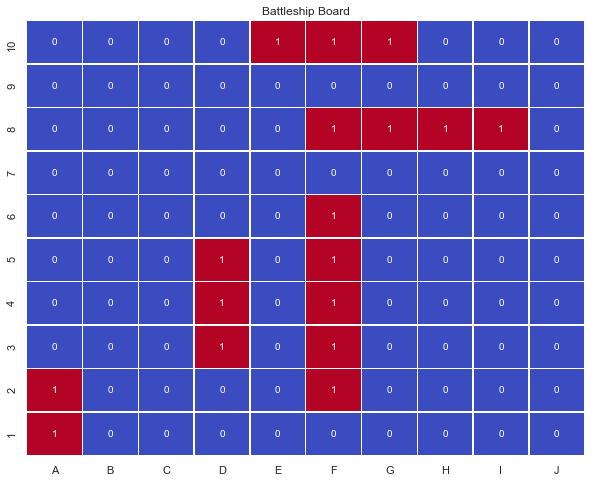

In [78]:
#create a new board and solution
board, solution = ship.new_board()

# print the genetic solution
print(solution)

# add the board to a dataframe for plotting
df = pd.DataFrame(board, columns=['A','B','C','D','E','F','G','H','I','J',])
df['ylabel'] = range(10,0,-1)
df = df.set_index('ylabel')

# print the board using a heatmap
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.heatmap(df, cmap='coolwarm', linewidths=0.5, annot=True, cbar=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Battleship Board')

# Generating Random Guesses of the Entire Board

51


Text(0.5, 1.0, 'Battleship Board')

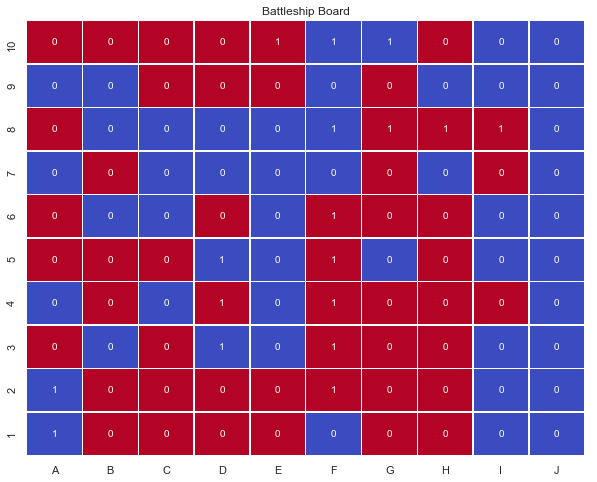

In [87]:
# create a random guess
rand_sol = np.random.randint(2, size=100).reshape((10, 10))
print(sum(sum(rand_sol)))

# overlay a random guess on the board using a heatmap
rand_df = pd.DataFrame(rand_sol, columns=['A','B','C','D','E','F','G','H','I','J',])
rand_df['ylabel'] = range(10,0,-1)
rand_df = rand_df.set_index('ylabel')

# print the random guess on the board using a heatmap
fig, ay = plt.subplots(1, 1, figsize = (10, 8))
sns.heatmap(rand_df, cmap='coolwarm', linewidths=0.5, annot=board, cbar=False)
ay.set_ylabel('')    
ay.set_xlabel('')
ay.set_title('Battleship Board')

Accuracy: 0.52


Text(0.5, 1.0, 'Battleship Board')

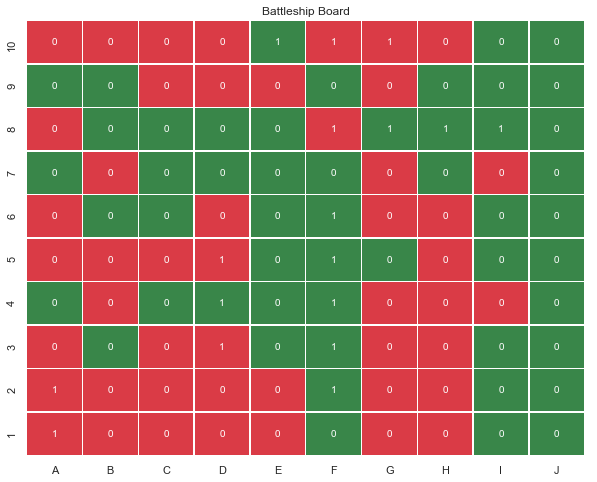

In [88]:
# show accuracy of the random guess
rand_sol_str = ''.join(str(x) for x in list(rand_sol.flatten()))
gene_matches = []
n_gene_matches = 0
    
for i in range(len(solution)):
    if solution[i] == rand_sol_str[i]:
        n_gene_matches += 1
        gene_matches.append(0)
    else:
        gene_matches.append(1)
            
accuracy = n_gene_matches / len(solution)
print('Accuracy: ' + str(accuracy))

gene_matches_arr = np.array(gene_matches).reshape((10, 10))

# overlay a random guess on the board using a heatmap
rand_df = pd.DataFrame(gene_matches_arr, columns=['A','B','C','D','E','F','G','H','I','J',])
rand_df['ylabel'] = range(10,0,-1)
rand_df = rand_df.set_index('ylabel')

# print the random guess on the board using a heatmap
fig, az = plt.subplots(1, 1, figsize = (10, 8))
rg = sns.diverging_palette(133, 10, as_cmap=True)
sns.heatmap(rand_df, cmap=rg, linewidths=0.5, annot=board, cbar=False)
az.set_ylabel('')    
az.set_xlabel('')
az.set_title('Battleship Board')

# Creating Descendent Generations

In [103]:
# run genetic algoritm to solve board
generation_size = 10
gene_pool = ga.solve(solution, generation_size)

In [104]:
# show the first generation
gene_pool.head(generation_size)

,Chromosome,Generation,Birth,Fitness,Parents,Elite
Sequence,,,,,,
1,1100110000100101000010110111010000010000101001...,1,Random,0.57,0,True
8,1001100000100010010011000010110100001111000010...,1,Random,0.57,0,True
2,1000011100110110101000011111000111001101100001...,1,Random,0.55,0,False
7,1101101001000100011110010101101101000101011001...,1,Random,0.54,0,False
9,0111011011010100101110000100001110000101110100...,1,Random,0.53,0,False
6,0001111110000110100010110111001001101100110111...,1,Random,0.52,0,False
4,0000000010000111101100011000101100110110111100...,1,Random,0.50,0,False
3,1000000110011010011101100011100001011111000100...,1,Random,0.48,0,False
5,0010011111010111101000010110101111101001001100...,1,Random,0.48,0,False


In [105]:
# show the second generation
gene_pool.iloc[10:20]

,Chromosome,Generation,Birth,Fitness,Parents,Elite
Sequence,,,,,,
13,1100110000100101000010110111010000010000101001...,2,Splice Pair,0.60,"[11, 12]",True
20,1000110000100101000010110111010000010000101001...,2,Mutation,0.58,11,True
11,1100110000100101000010110111010000010000101001...,2,Elitism,0.57,1,False
12,1001100000100010010011000010110100001111000010...,2,Elitism,0.57,8,False
15,1100110000100101000010110111010000010000101001...,2,Mutation,0.57,11,False
16,1100110000100101000010110111010000010000101001...,2,Mutation,0.57,11,False
17,1100110000100101000010110111010000010000101001...,2,Mutation,0.57,11,False
18,1100110000100101000010110111010000010000101001...,2,Mutation,0.57,11,False
19,1100110000100101000010110111010000010000101001...,2,Mutation,0.57,11,False


In [106]:
# show the last generation
gene_pool.tail(generation_size)

,Chromosome,Generation,Birth,Fitness,Parents,Elite
Sequence,,,,,,
1550,0000111000000000000000000111100000000000000001...,155,Mutation,1.00,1542,True
1541,0000111000000000000000000111100000000000000001...,155,Elitism,0.99,1531,True
1542,0000111000000000000000000111100000000000000001...,155,Elitism,0.99,1532,False
1543,0000111000000000000000000111100000000000000001...,155,Splice Pair,0.99,"[1542, 1541]",False
1544,0000111000000000000000000111100000000000000001...,155,Splice Pair,0.99,"[1542, 1541]",False
1549,0000111000000000000000000111100000000000000001...,155,Mutation,0.99,1541,False
1546,0000111000000000000000000111100000000000000001...,155,Mutation,0.98,1541,False
1545,0000111000000000000000000111100000000000000001...,155,Mutation,0.97,1541,False
1547,0000111000000000000000000111100000000000000101...,155,Mutation,0.97,1541,False


In [107]:
# show the fitness stats of the first 10 generations
gene_pool_stats = gene_pool.groupby('Generation').describe()
gene_pool_stats.head(10)

Fitness                                                    
             count   mean       std   min     25%    50%     75%   max
Generation                                                            
1             10.0  0.518  0.042635  0.44  0.4850  0.525  0.5475  0.57
2             10.0  0.571  0.014491  0.54  0.5700  0.570  0.5700  0.60
3             10.0  0.593  0.014181  0.57  0.5825  0.590  0.6075  0.61
4             10.0  0.609  0.005676  0.60  0.6100  0.610  0.6100  0.62
5             10.0  0.612  0.006325  0.60  0.6100  0.610  0.6175  0.62
6             10.0  0.622  0.004216  0.62  0.6200  0.620  0.6200  0.63
7             10.0  0.631  0.008756  0.62  0.6225  0.630  0.6400  0.64
8             10.0  0.637  0.004830  0.63  0.6325  0.640  0.6400  0.64
9             10.0  0.639  0.008756  0.63  0.6300  0.640  0.6475  0.65
10            10.0  0.646  0.009661  0.62  0.6500  0.650  0.6500  0.65

# Converging to the Genetic Solution

In [108]:
# show the fitness stats of the last 10 generations
gene_pool_stats.tail(10)

Fitness                                                  
             count   mean       std   min     25%    50%   75%   max
Generation                                                          
146           10.0  0.983  0.009487  0.96  0.9800  0.985  0.99  0.99
147           10.0  0.985  0.007071  0.97  0.9800  0.990  0.99  0.99
148           10.0  0.980  0.014907  0.95  0.9725  0.990  0.99  0.99
149           10.0  0.986  0.009661  0.96  0.9900  0.990  0.99  0.99
150           10.0  0.988  0.006325  0.97  0.9900  0.990  0.99  0.99
151           10.0  0.982  0.010328  0.96  0.9800  0.985  0.99  0.99
152           10.0  0.983  0.010593  0.96  0.9800  0.990  0.99  0.99
153           10.0  0.986  0.006992  0.97  0.9825  0.990  0.99  0.99
154           10.0  0.985  0.008498  0.97  0.9825  0.990  0.99  0.99
155           10.0  0.984  0.010750  0.97  0.9725  0.990  0.99  1.00

Text(0.5, 1.0, 'Gene Pool Statistics')

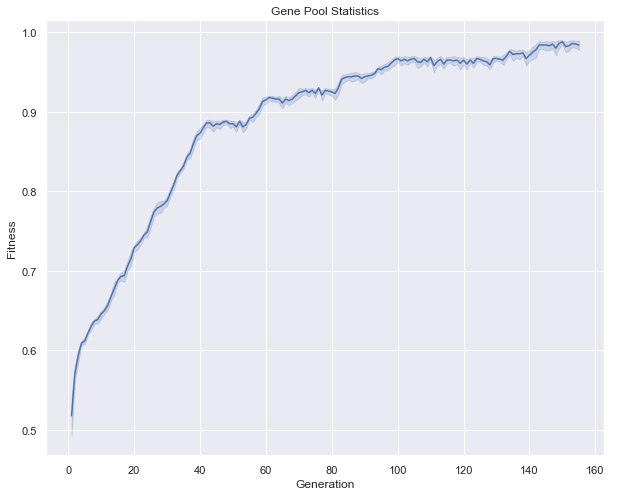

In [109]:
# show the convergence of the gene pool
fig, ay = plt.subplots(1, 1, figsize = (10, 8))
ay = sns.lineplot(x="Generation", y="Fitness", data=gene_pool)
ay.set_title('Gene Pool Statistics')

# Tuning the Model Parameters

In [39]:
# solve 10,000 boards with genetic algorithm
gene_pool_samples = []

for i in range(1000):
    print(i)
    
    #create a new board and solution
    board, solution = ship.new_board()
    
    # run genetic algoritm to solve board
    generation_size = 10
    gene_pool = ga.solve(solution, generation_size)
    
    gene_pool_samples.append(gene_pool.shape[0])

0
Correct number of pieces on board
1
Correct number of pieces on board
2
Correct number of pieces on board
3
Correct number of pieces on board
4
Correct number of pieces on board
5
Correct number of pieces on board
6
Correct number of pieces on board
7
Correct number of pieces on board
8
Correct number of pieces on board
9
Correct number of pieces on board
10
Correct number of pieces on board
11
Correct number of pieces on board
12
Correct number of pieces on board
13
Correct number of pieces on board
14
Correct number of pieces on board
15
Correct number of pieces on board
16
Correct number of pieces on board
17
Correct number of pieces on board
18
Correct number of pieces on board
19
Correct number of pieces on board
20
Correct number of pieces on board
21
Correct number of pieces on board
22
Correct number of pieces on board
23
Correct number of pieces on board
24
Correct number of pieces on board
25
Correct number of pieces on board
26
Correct number of pieces on board
27
Correct 

219
Correct number of pieces on board
220
Correct number of pieces on board
221
Correct number of pieces on board
222
Correct number of pieces on board
223
Correct number of pieces on board
224
Correct number of pieces on board
225
Correct number of pieces on board
226
Correct number of pieces on board
227
Correct number of pieces on board
228
Correct number of pieces on board
229
Correct number of pieces on board
230
Correct number of pieces on board
231
Correct number of pieces on board
232
Correct number of pieces on board
233
Correct number of pieces on board
234
Correct number of pieces on board
235
Correct number of pieces on board
236
Correct number of pieces on board
237
Correct number of pieces on board
238
Correct number of pieces on board
239
Correct number of pieces on board
240
Correct number of pieces on board
241
Correct number of pieces on board
242
Correct number of pieces on board
243
Correct number of pieces on board
244
Correct number of pieces on board
245
Correct 

435
Correct number of pieces on board
436
Correct number of pieces on board
437
Correct number of pieces on board
438
Correct number of pieces on board
439
Correct number of pieces on board
440
Correct number of pieces on board
441
Correct number of pieces on board
442
Correct number of pieces on board
443
Correct number of pieces on board
444
Correct number of pieces on board
445
Correct number of pieces on board
446
Correct number of pieces on board
447
Correct number of pieces on board
448
Correct number of pieces on board
449
Correct number of pieces on board
450
Correct number of pieces on board
451
Correct number of pieces on board
452
Correct number of pieces on board
453
Correct number of pieces on board
454
Correct number of pieces on board
455
Correct number of pieces on board
456
Correct number of pieces on board
457
Correct number of pieces on board
458
Correct number of pieces on board
459
Correct number of pieces on board
460
Correct number of pieces on board
461
Correct 

651
Correct number of pieces on board
652
Correct number of pieces on board
653
Correct number of pieces on board
654
Correct number of pieces on board
655
Correct number of pieces on board
656
Correct number of pieces on board
657
Correct number of pieces on board
658
Correct number of pieces on board
659
Correct number of pieces on board
660
Correct number of pieces on board
661
Correct number of pieces on board
662
Correct number of pieces on board
663
Correct number of pieces on board
664
Correct number of pieces on board
665
Correct number of pieces on board
666
Correct number of pieces on board
667
Correct number of pieces on board
668
Correct number of pieces on board
669
Correct number of pieces on board
670
Correct number of pieces on board
671
Correct number of pieces on board
672
Correct number of pieces on board
673
Correct number of pieces on board
674
Correct number of pieces on board
675
Correct number of pieces on board
676
Correct number of pieces on board
677
Correct 

867
Correct number of pieces on board
868
Correct number of pieces on board
869
Correct number of pieces on board
870
Correct number of pieces on board
871
Correct number of pieces on board
872
Correct number of pieces on board
873
Correct number of pieces on board
874
Correct number of pieces on board
875
Correct number of pieces on board
876
Correct number of pieces on board
877
Correct number of pieces on board
878
Correct number of pieces on board
879
Correct number of pieces on board
880
Correct number of pieces on board
881
Correct number of pieces on board
882
Correct number of pieces on board
883
Correct number of pieces on board
884
Correct number of pieces on board
885
Correct number of pieces on board
886
Correct number of pieces on board
887
Correct number of pieces on board
888
Correct number of pieces on board
889
Correct number of pieces on board
890
Correct number of pieces on board
891
Correct number of pieces on board
892
Correct number of pieces on board
893
Correct 

Text(0.5, 1.0, 'Performance for 1000 Genetic Algorithm Samples')

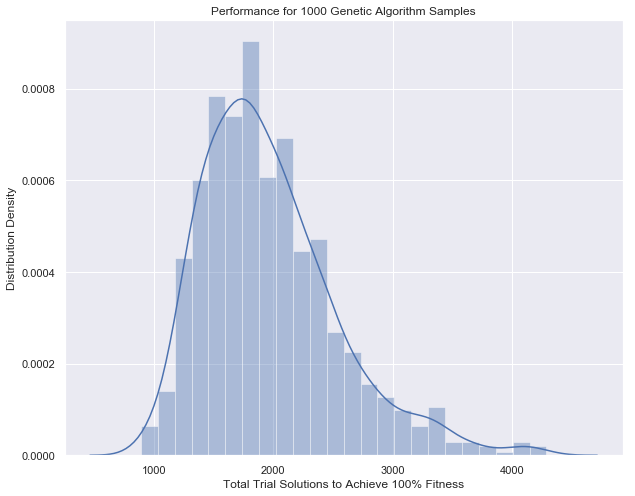

In [40]:
# Draw a histogram for gene pool samples
fig, aa = plt.subplots(1, 1, figsize = (10, 8))
aa = sns.distplot(gene_pool_samples)
aa.set_xlabel('Total Trial Solutions to Achieve 100% Fitness')    
aa.set_ylabel('Distribution Density')
aa.set_title('Performance for 1000 Genetic Algorithm Samples')